In [1]:
# vimd_subset_loader.py
# Load a small balanced subset of the ViMD dataset for pronunciation analysis

from datasets import load_dataset
from collections import defaultdict
import torchaudio
import pandas as pd
import os

/opt/anaconda3/envs/soundmirror/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
print("Loading dataset subset...")
vimd_subset = load_dataset("nguyendv02/ViMD_Dataset", split="train[:5%]")

Loading dataset subset...


Repo card metadata block was not found. Setting CardData to empty.


In [24]:
Counter(vimd_subset['region'])

Counter({'North': 751})

In [4]:
filtered_subset = vimd_subset.filter(lambda x: x["region"] in ["North", "South"])

Filter: 100%|██████████| 751/751 [00:19<00:00, 38.27 examples/s]


In [5]:
filtered_subset

Dataset({
    features: ['region', 'province_code', 'province_name', 'filename', 'text', 'speakerID', 'gender', 'audio'],
    num_rows: 751
})

In [8]:
df = pd.DataFrame(filtered_subset)

In [9]:
df

,region,province_code,province_name,filename,text,speakerID,gender,audio
0,North,11,CaoBang,11_0001.wav,"Nghiên cứu học tập,các ứng dụng các khoa học c...",spk_11_0001,1,"{'path': '11_0001.wav', 'array': [0.0101318359..."
1,North,11,CaoBang,11_0002.wav,Chuyển đổi số hiện nay đang được là đang được ...,spk_11_0001,1,"{'path': '11_0002.wav', 'array': [-0.000183105..."
2,North,11,CaoBang,11_0003.wav,Trong quá trình mình làm việc để quản lý thông...,spk_11_0002,1,"{'path': '11_0003.wav', 'array': [-0.006103515..."
3,North,11,CaoBang,11_0004.wav,Ý tưởng đầu tiên tôi phải nhắc đến là vấn đề v...,spk_11_0002,1,"{'path': '11_0004.wav', 'array': [0.0037841796..."
4,North,11,CaoBang,11_0005.wav,giúp giải quyết đa dạng các nội dung trong quả...,spk_11_0002,1,"{'path': '11_0005.wav', 'array': [-0.002777099..."
...,...,...,...,...,...,...,...,...
746,North,14,QuangNinh,14_0220.wav,thì du lịch Quảng Ninh và du lịch Hải Phòng nó...,spk_14_0176,0,"{'path': '14_0220.wav', 'array': [0.0137634277..."
747,North,14,QuangNinh,14_0221.wav,cùng với một đồng chí đảng viên ở khu phố và b...,spk_14_0177,1,"{'path': '14_0221.wav', 'array': [-0.001388549..."
748,North,14,QuangNinh,14_0222.wav,"Thì trong giai đoạn đó, anh em chúng tôi thấy ...",spk_14_0177,1,"{'path': '14_0222.wav', 'array': [-0.001281738..."
749,North,14,QuangNinh,14_0223.wav,Cái ước mơ trở thành sự thật. Đó là cái điều m...,spk_14_0178,0,"{'path': '14_0223.wav', 'array': [0.0005340576..."


In [10]:
# Step A4: Group examples by region and speaker ID
grouped = defaultdict(list)
for ex in filtered_subset:
    key = (ex["region"], ex["speakerID"])
    grouped[key].append(ex)

# Step A5: Select 3 speakers per region (first 3 utterances per speaker)
final_subset = []
region_speakers = defaultdict(set)
for (region, speaker), examples in grouped.items():
    if len(region_speakers[region]) < 3:
        final_subset.extend(examples[:3])
        region_speakers[region].add(speaker)

In [12]:
len(final_subset)

6

In [13]:
final_subset

[{'region': 'North',
  'province_code': 11,
  'province_name': 'CaoBang',
  'filename': '11_0001.wav',
  'text': 'Nghiên cứu học tập,các ứng dụng các khoa học công nghệ và những dụng tiên tiến để đưa vào trong áp dụng trong công việc của mình. Từ đó giúp chuyển đổi những cái khó khăn trong công việc, đưa ra những thuận lợi và những cái nhanh gọn hơn giải quyết các thủ tục hành chính cho được thuận tiện hơn.',
  'speakerID': 'spk_11_0001',
  'gender': 1,
  'audio': {'path': '11_0001.wav',
   'array': array([ 0.01013184,  0.00985718,  0.00961304, ..., -0.0005188 ,
          -0.0005188 , -0.00033569]),
   'sampling_rate': 44100}},
 {'region': 'North',
  'province_code': 11,
  'province_name': 'CaoBang',
  'filename': '11_0002.wav',
  'text': 'Chuyển đổi số hiện nay đang được là đang được Đảng và Nhà nước ta rất chú trọng và quan tâm. Tỉnh ta đã có rất nhiều văn bản chỉ đạo cho tổ chức đoàn thể và tổ chức chính quyền thực hiện những cái công trình chuyển đổi số đưa vào trong cuộc sống. Đản

In [14]:
from collections import Counter

speaker_counts = Counter([row["speakerID"] for row in filtered_subset])
multiple_utterance_speakers = [spk for spk, count in speaker_counts.items() if count > 1]
print(f"Speakers with >1 utterance: {len(multiple_utterance_speakers)}")

Speakers with >1 utterance: 191


In [18]:
len(final_subset)

6

In [19]:
df['province_name'].value_counts()

CaoBang      287
LangSon      240
QuangNinh    224
Name: province_name, dtype: int64

In [21]:
df['region'].value_counts()

North    751
Name: region, dtype: int64

### Extract Tones

In [29]:
# extract_tone_f0_windows.py
# Step: Identify utterances with specific tones, approximate time windows, extract F0

import os
import re
import pandas as pd
import torchaudio
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Configurations
TONE_MARKS = {
    "T4": ["ạ", "ặ", "ậ", "ẹ", "ệ", "ọ","ộ", "ợ", "ụ", "ự"]
}
TONE_NAME = "T4"
WINDOW_SIZE_SECONDS = 0.5

# Load metadata CSV
metadata = pd.read_csv("../../applied_tool/data/vimd_subset_metadata.csv")

In [32]:
metadata.shape

(200, 6)

In [30]:
def contains_tone(text, tone_marks):
    return any(char in text for char in tone_marks)

filtered_meta = metadata[metadata["text"].apply(lambda x: contains_tone(x, TONE_MARKS[TONE_NAME]))].reset_index(drop=True)


In [33]:
def extract_f0_segment(audio_path, window_size=WINDOW_SIZE_SECONDS):
    y, sr = torchaudio.load(audio_path)
    y = y.numpy().squeeze()
    center = len(y) // 2
    half_window = int(sr * window_size / 2)
    start = max(center - half_window, 0)
    end = min(center + half_window, len(y))
    segment = y[start:end]
    
    f0, voiced_flag, _ = librosa.pyin(segment.astype(np.float32), 
                                      fmin=librosa.note_to_hz('C2'), 
                                      fmax=librosa.note_to_hz('C7'))
    return f0

In [34]:
audio_path = '../../applied_tool/data/audio/North_CaoBang_spk_11_0001_11_0001.wav'
f0_sample = extract_f0_segment(audio_path, window_size=WINDOW_SIZE_SECONDS)

In [35]:
f0_sample

array([        nan, 72.15494574, 71.73936384, 70.91536696, 70.1008345 ,
       67.71294273, 70.91536696, 76.88834638, 71.73936384, 65.7852867 ,
       67.71294273, 72.57293509, 65.40639133, 65.40639133, 68.89654412,
       65.40639133, 65.40639133, 65.40639133, 65.40639133, 70.50692451,
       65.40639133, 65.40639133, 79.1413469 , 66.93519325, 74.26924704,
       75.56745061, 69.69708341, 65.40639133, 75.56745061, 77.78174593,
       80.9911882 , 65.40639133, 65.40639133, 65.40639133, 65.40639133,
       65.40639133, 65.40639133, 65.40639133, 76.44550209, 75.13221412,
               nan, 65.40639133, 65.40639133, 74.69948441])

In [37]:
import unicodedata

def is_nang_tone(syllable):
    # Normalize the syllable to decompose characters into base + combining diacritics
    decomposed = unicodedata.normalize("NFD", syllable)
    return "\u0323" in decomposed  # COMBINING DOT BELOW

syllables = ["mẹ", "mạ", "ma", "má", "mà", "mả", "mã"]
for s in syllables:
    print(s, "→", is_nang_tone(s))

mẹ → True
mạ → True
ma → False
má → False
mà → False
mả → False
mã → False


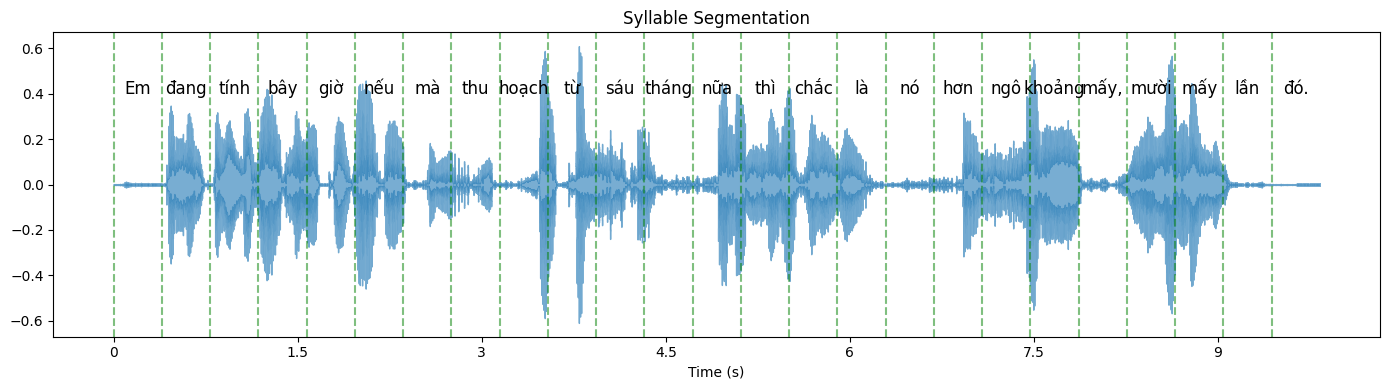

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def is_nang_tone(syllable):
    # T4 (nặng) tone marker in Vietnamese is the dot below: ̣
    return "̣" in syllable

def estimate_syllable_boundaries(y, sr, num_syllables):
    # Compute short-term energy
    frame_length = int(0.025 * sr)
    hop_length = int(0.010 * sr)
    energy = np.array([
        np.sum(np.abs(y[i:i+frame_length])**2)
        for i in range(0, len(y), hop_length)
    ])
    energy = energy / np.max(energy)

    # Smooth energy and find dips (approximate syllable separation)
    from scipy.ndimage import gaussian_filter1d
    smooth_energy = gaussian_filter1d(energy, sigma=2)

    # Find local minima (valleys)
    from scipy.signal import find_peaks
    inv_energy = 1.0 - smooth_energy
    peaks, _ = find_peaks(inv_energy, distance=sr//10)

    # Convert energy frame peaks to sample indices
    syllable_boundaries = np.linspace(0, len(y), num_syllables + 1, dtype=int)
    return syllable_boundaries

def plot_syllables(audio_path, transcript):
    y, sr = librosa.load(audio_path, sr=None)
    syllables = transcript.strip().split()
    num_syllables = len(syllables)

    boundaries = estimate_syllable_boundaries(y, sr, num_syllables)

    plt.figure(figsize=(14, 4))
    librosa.display.waveshow(y, sr=sr, alpha=0.6)
    for i, (start, end) in enumerate(zip(boundaries[:-1], boundaries[1:])):
        x = (start + end) / 2 / sr
        syll = syllables[i] if i < len(syllables) else "?"
        color = "red" if is_nang_tone(syll) else "black"
        plt.axvline(start / sr, color='green', linestyle='--', alpha=0.5)
        plt.text(x, 0.4, syll, color=color, ha="center", fontsize=12)
    plt.title(f"Syllable Segmentation")
    plt.xlabel("Time (s)")
    plt.tight_layout()
    plt.show()

def estimate_syllable_boundaries_enhanced(y, sr, syllables, hop_length=256, tolerance=0.5):
    """
    Improved estimation of syllable boundaries using onset detection and midpoints.
    If the number of detected onsets is close to (len(syllables)-1), we use them.
    Otherwise, we fall back to linear interpolation.
    
    Parameters:
      y: Audio signal.
      sr: Sampling rate.
      syllables: List of syllable strings.
      hop_length: Hop length for onset strength computation.
      tolerance: Fractional tolerance to decide if the number of onsets is acceptable.
                 For example, tolerance=0.5 means we accept if the number of detected onsets 
                 is within ±50% of (expected_onsets = len(syllables)-1).
    """
    expected_onsets = len(syllables) - 1
    # Compute onset envelope and smooth it.
    onset_env = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
    onset_env_smooth = gaussian_filter1d(onset_env, sigma=2)
    # Detect peaks (onsets) with a minimum distance of about 100ms.
    peaks, _ = find_peaks(onset_env_smooth, distance=int(0.1 * sr / hop_length))
    onset_samples = librosa.frames_to_samples(peaks, hop_length=hop_length)
    
    # Check if the number of onsets is reasonably close to expected.
    if expected_onsets > 0 and abs(len(onset_samples) - expected_onsets) / expected_onsets <= tolerance:
        # If we have too many onsets, select the strongest ones.
        if len(onset_samples) > expected_onsets:
            onset_strengths = onset_env_smooth[peaks]
            strongest_indices = np.argsort(onset_strengths)[-expected_onsets:]
            onset_samples = np.sort(onset_samples[strongest_indices])
        # Form boundaries by taking 0, the detected onsets, and the end of the signal.
        boundaries = np.concatenate(([0], onset_samples, [len(y)]))
        # To smooth out any irregular spacing, you can optionally take midpoints between adjacent boundaries.
        # For example:
        # mid_boundaries = [boundaries[0]]
        # for i in range(1, len(boundaries)):
        #     mid_boundaries.append(int((boundaries[i-1] + boundaries[i]) / 2))
        # boundaries = np.array([boundaries[0]] + mid_boundaries[1:] + [boundaries[-1]])
        # However, if the detected boundaries seem acceptable, you can keep them as is.
        if len(boundaries) != len(syllables) + 1:
            # If the count is off, fall back to interpolation.
            boundaries = np.linspace(0, len(y), len(syllables) + 1, dtype=int)
    else:
        # Fall back to evenly spaced boundaries.
        boundaries = np.linspace(0, len(y), len(syllables) + 1, dtype=int)
    
    return boundaries

# Example usage: update with your actual file
if __name__ == "__main__":
    audio_path = "../../applied_tool/data/audio/North_LaoCai_spk_24_0004_24_0004.wav"  # update to match a real file
    transcript = """Em đang tính bây giờ nếu mà thu hoạch từ sáu tháng nữa thì chắc là nó hơn ngô khoảng mấy, mười mấy lần đó."""
    plot_syllables(audio_path, transcript)

In [6]:
audio_path = "../../applied_tool/data/audio/North_LaoCai_spk_24_0004_24_0004.wav"  # update to match a real file
transcript = """Em đang tính bây giờ nếu mà thu hoạch từ sáu tháng nữa thì chắc là nó hơn ngô khoảng mấy, mười mấy lần đó."""
estimate_syllable_boundaries_enhanced(audio_path, sr=22050, syllables=transcript.strip().split())

ParameterError: Audio data must be of type numpy.ndarray

In [42]:
metadata = pd.read_csv("../../applied_tool/data/vimd_subset_metadata.csv")

In [51]:
metadata.head()

,region,province,speaker,gender,filename,text
0,North,CaoBang,spk_11_0001,1,North_CaoBang_spk_11_0001_11_0001.wav,"Nghiên cứu học tập,các ứng dụng các khoa học c..."
1,North,CaoBang,spk_11_0002,1,North_CaoBang_spk_11_0002_11_0003.wav,Trong quá trình mình làm việc để quản lý thông...
2,North,CaoBang,spk_11_0003,0,North_CaoBang_spk_11_0003_11_0006.wav,Em rất là tự hào vì năm đầu tiên em được tham ...
3,North,CaoBang,spk_11_0004,0,North_CaoBang_spk_11_0004_11_0007.wav,"Em cảm thấy rất là tự hào và qua cái lễ hội, l..."
4,North,CaoBang,spk_11_0005,1,North_CaoBang_spk_11_0005_11_0008.wav,Năm nay thì Cao Trương tôi thì cũng chuẩn bị n...


<Axes: >

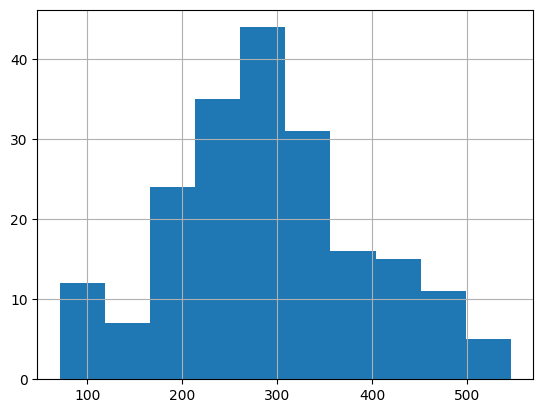

In [45]:
metadata['text'].apply(lambda x: len(x)).hist()

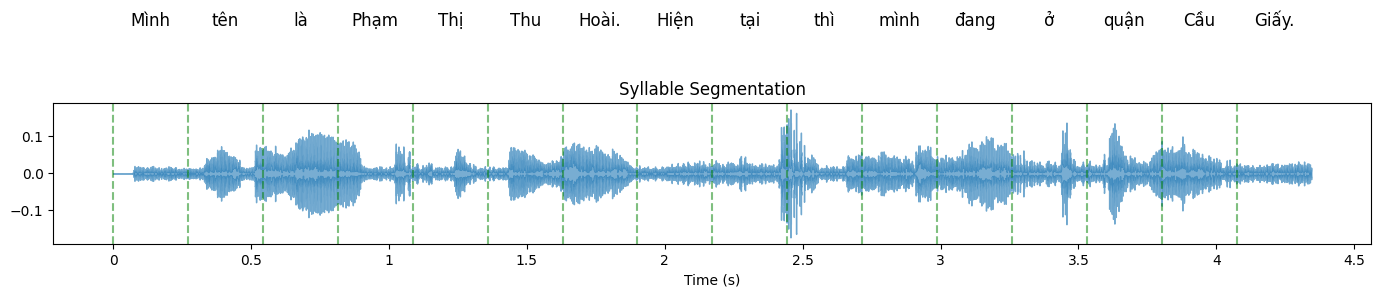

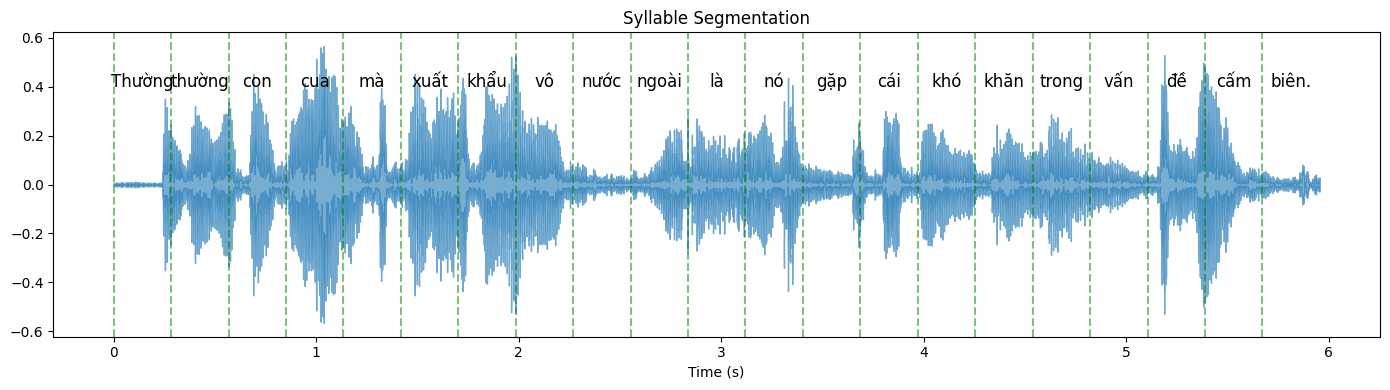

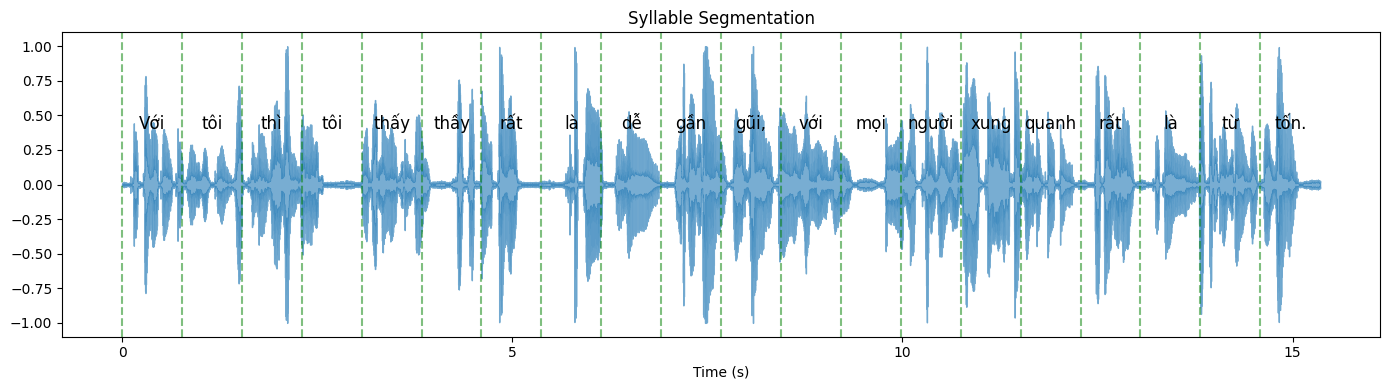

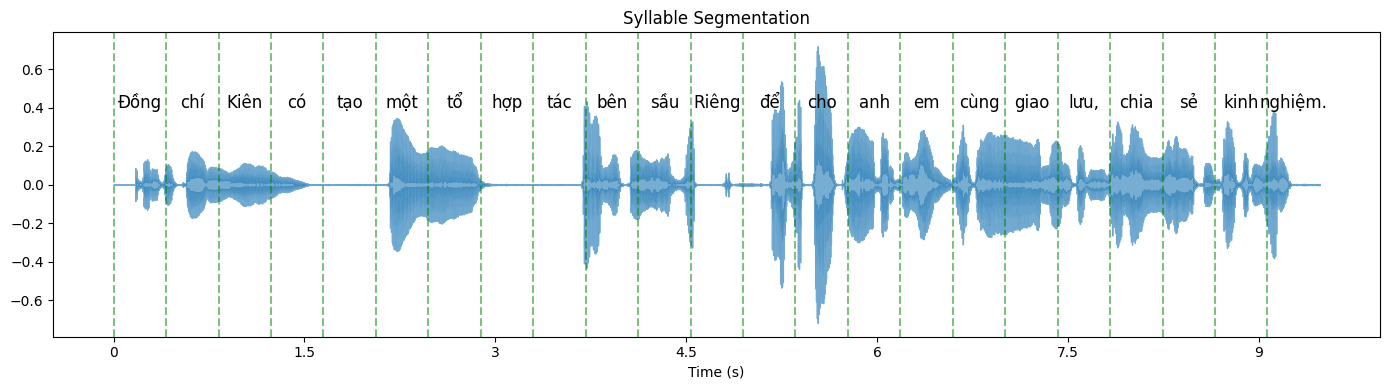

In [50]:
metadata_short_sent = metadata[metadata['text'].apply(lambda x: len(x) < 100)]

for i, row in metadata_short_sent.iterrows():
    audio_path = f"../../applied_tool/data/audio/{row['filename']}"
    transcript = row['text']
    plot_syllables(audio_path, transcript)
